# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  
* Then construct a frequency table of these values for all people, 
* then for women only, and for men only.  
* Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
da.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN


In [4]:
# insert your code here
da['DMDMARTLX'] =da.DMDMARTL.replace({
    1:'Married',
    2:'Unmarried',
    3:'Divorced',
    4:'Widowed',
    5:'Separated',
    6:'Divorced',
    77:'Refused',
    99:"Don't Know"
})
da['DMDMARTLX']

0         Married
1        Divorced
2         Married
3        Divorced
4        Divorced
          ...    
5730    Unmarried
5731      Married
5732    Unmarried
5733      Married
5734    Separated
Name: DMDMARTLX, Length: 5735, dtype: object

In [5]:
#for all people 
da['DMDMARTLX'].value_counts()

Married      2780
Divorced     1106
Separated    1004
Unmarried     396
Widowed       186
Refused         2
Name: DMDMARTLX, dtype: int64

In [6]:
# Rename Genders 
da["RIAGENDRx"] =da["RIAGENDR"].replace({
    1:"Male",
    2:"Female"
})

In [56]:
#for men only 
df_male = da.query('RIAGENDRx == "Male"').copy()
x = df_male.DMDMARTLX.value_counts()
x/x.sum()

Married      0.562881
Divorced     0.188262
Separated    0.184451
Unmarried    0.038110
Widowed      0.025915
Refused      0.000381
Name: DMDMARTLX, dtype: float64

In [49]:
#for women only
df_female =da.query('RIAGENDRx == "Female"').copy()
x = df_female.DMDMARTLX.value_counts()
x/x.sum()

Married      0.457193
Divorced     0.214737
Separated    0.182456
Unmarried    0.103860
Widowed      0.041404
Refused      0.000351
Name: DMDMARTLX, dtype: float64

In [42]:
# compare all the groups of age between 30-40 years old 
# make bins of age and then quering them 
da["agegrp"]  = pd.cut(da.RIDAGEYR,[18,30,40,50,60,70,80])

(18, 30]    1153
(30, 40]     932
(50, 60]     924
(40, 50]     903
(60, 70]     878
(70, 80]     812
Name: agegrp, dtype: int64

In [46]:
# genral population in our age group
df_30 = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].copy()
df_30.DMDMARTLX.value_counts()

Married      560
Separated    217
Divorced     213
Widowed       30
Unmarried      5
Refused        1
Name: DMDMARTLX, dtype: int64

In [54]:
# for female population
y = df_30.query('RIAGENDRx == "Female"').DMDMARTLX.value_counts()

y/y.sum() 

Married      0.535714
Separated    0.218045
Divorced     0.208647
Widowed      0.033835
Unmarried    0.003759
Name: DMDMARTLX, dtype: float64

In [55]:
# for male population
m = df_30.query('RIAGENDRx == "Male"').DMDMARTLX.value_counts()
m/m.sum()

Married      0.556680
Divorced     0.206478
Separated    0.204453
Widowed      0.024291
Unmarried    0.006073
Refused      0.002024
Name: DMDMARTLX, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

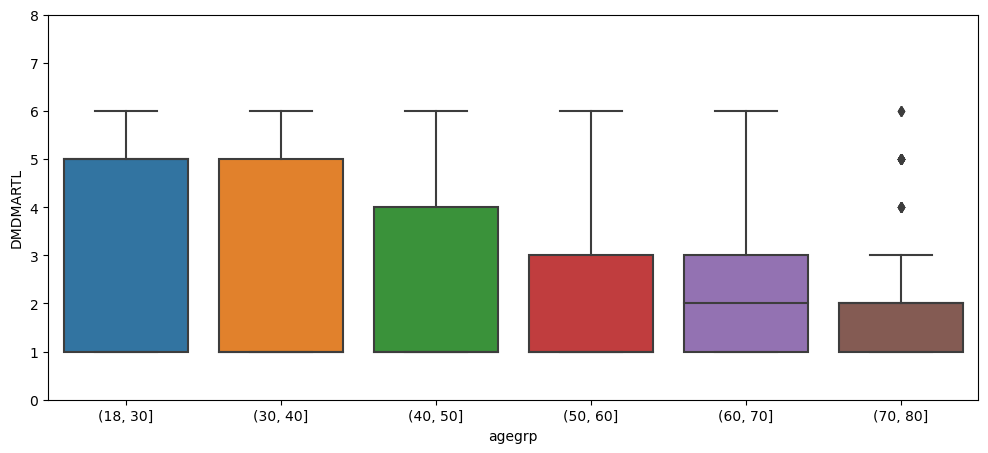

In [67]:
#  here this for me :)
# df_female.head()
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="DMDMARTL", data=df_female)  # Make boxplot of BPXSY1 stratified by age group
plt.ylim(0, 8)
plt.show()

In [98]:
df_female.RIAGENDRx

3       Female
4       Female
5       Female
7       Female
12      Female
         ...  
5724    Female
5727    Female
5730    Female
5732    Female
5734    Female
Name: RIAGENDRx, Length: 2976, dtype: object

In [110]:
# insert your code
# df_female.DMDMARTLX.value_counts()
dx = df_female.groupby(["agegrp","DMDMARTLX"])['RIAGENDRx'].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x : x /x.sum() ,axis = 0 )
# print(dx.to_string(float_format="%.3f"))
dx

RIAGENDRx             Female
agegrp   DMDMARTLX          
(18, 30] Divorced   0.043860
         Married    0.055439
         Separated  0.090877
         Widowed    0.003860
(30, 40] Divorced   0.035088
         Married    0.090526
         Separated  0.034035
         Unmarried  0.000702
         Widowed    0.005965
(40, 50] Divorced   0.037193
         Married    0.101053
         Separated  0.022105
         Unmarried  0.004211
         Widowed    0.011579
(50, 60] Divorced   0.040351
         Married    0.090175
         Refused    0.000351
         Separated  0.014737
         Unmarried  0.009825
         Widowed    0.009474
(60, 70] Divorced   0.036491
         Married    0.074386
         Separated  0.013333
         Unmarried  0.022807
         Widowed    0.007719
(70, 80] Divorced   0.021754
         Married    0.045614
         Separated  0.007368
         Unmarried  0.066316
         Widowed    0.002807

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [ ]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [ ]:
# insert your code here

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [ ]:
# insert your code here

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [ ]:
# insert your code here

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
# insert your code here

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [ ]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.